### Universal Function Approximation

b and c)

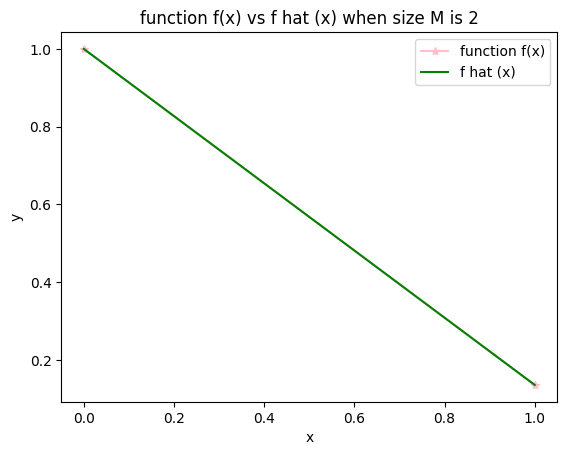

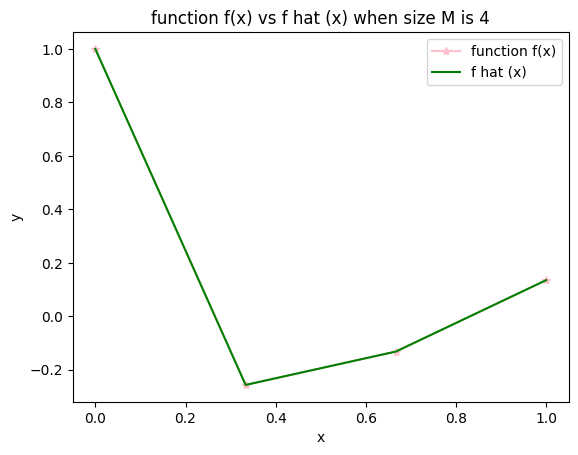

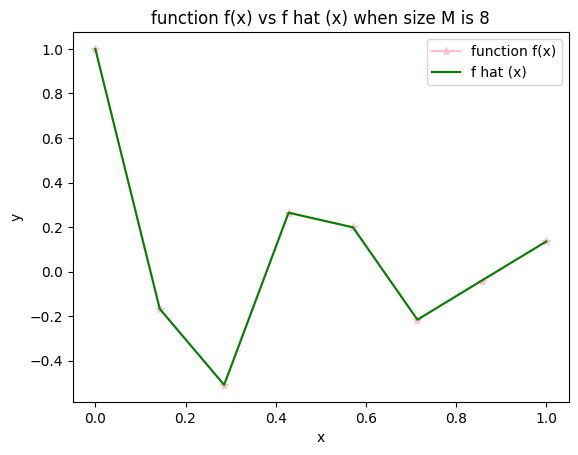

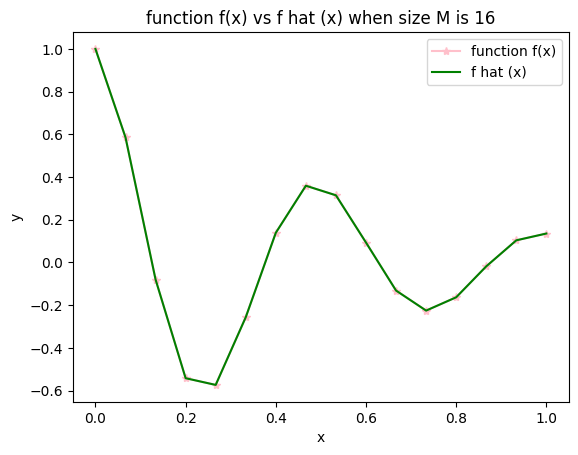

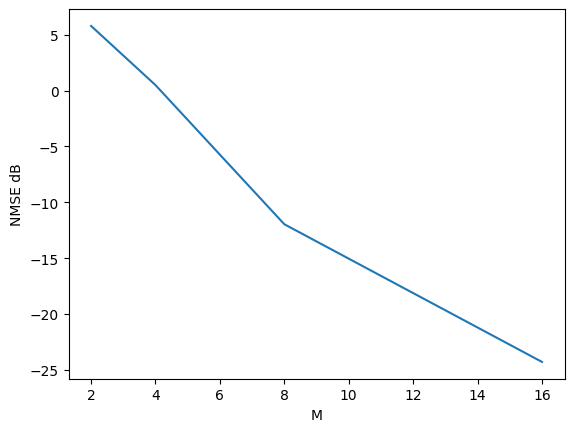

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return np.exp(-2*x)*np.cos(4*np.pi*x)

def g_m(m):
    return np.linspace(0, 1, m)

def piecewise_linear_approximation(x, y):
    m = len(x)
    weights = np.zeros(m)
    weights[0] = x[0]
    for i in range(m-1):
        weights[i+1] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    f_hat = np.zeros(m)
    f_hat[0] = y[0]
    for i in range(m-1):
        f_hat[i+1] = f_hat[i] + weights[i+1] * max(0, x[i+1] - x[i])
    return f_hat

def ms_error(f, f_hat, x_grid, G=10000):
    x_fine = np.linspace(0, 1, G)
    f_fine = f(x_fine)
    f_hat_fine = np.interp(x_fine, x_grid, f_hat)
    sq_error = (f_fine - f_hat_fine) ** 2
    mse = np.mean(sq_error)
    ref = np.mean(f_fine ** 2)
    return mse / ref

#def plot_piecewise_linear_approximation(m_values):
#    for m in m_values:
#        x = g_m(m)
#        y = function(x)
#        f_est = piecewise_linear_approximation(x, y)
#        plt.plot(x, y, marker='*', color='pink', label='function f(x)')
#        plt.plot(x, f_est, color='green', label='f hat (x)')
#        plt.xlabel('x')
#        plt.ylabel('y')
#        plt.title(f'function f(x) vs f hat (x) when size M is {m}')
#        plt.legend()
#        plt.show()
        
def plot_piecewise_linear_approximation(m_values):
    nmse = []
    for m in m_values:
        x = g_m(m)
        y = function(x)
        f_est = piecewise_linear_approximation(x, y)
        nmse.append(10*np.log10(ms_error(function, f_est, x, G=10000)))
        plt.plot(x, y, marker='*', color='pink', label='function f(x)')
        plt.plot(x, f_est, color='green', label='f hat (x)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'function f(x) vs f hat (x) when size M is {m}')
        plt.legend()
        plt.show()

    plt.plot(m_values, nmse)
    plt.xlabel("M")
    plt.ylabel("NMSE dB")
    plt.show()

plot_piecewise_linear_approximation([2, 4, 8, 16])
